In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
sales = pd.read_csv('vgsales.csv')
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Data Cleaning

In [4]:
sales['Year'].isna().value_counts()

False    16327
True       271
Name: Year, dtype: int64

In [5]:
vgsales = sales.dropna()
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
year_count = vgsales.groupby('Year').agg('count')
year_count = year_count.drop([2017,2020])
year_count.head()

,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,,,,,
1980.0,9,9,9,9,9,9,9,9,9,9
1981.0,46,46,46,46,46,46,46,46,46,46
1982.0,36,36,36,36,36,36,36,36,36,36
1983.0,17,17,17,17,17,17,17,17,17,17
1984.0,14,14,14,14,14,14,14,14,14,14


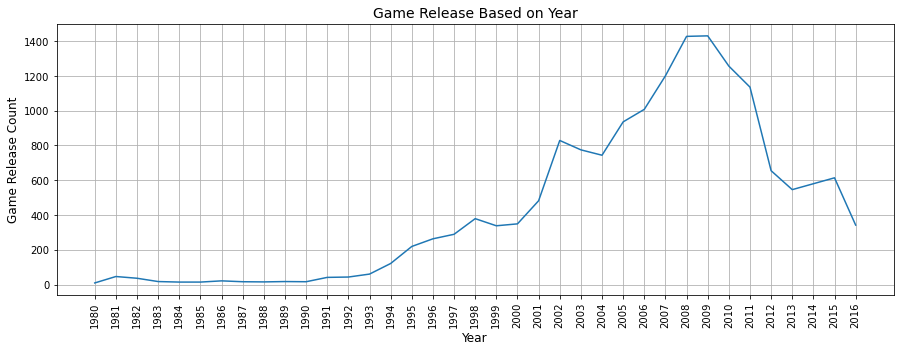

In [7]:
year = year_count.index

plt.figure(figsize=(15,5))
plt.plot(year_count.index, year_count['Rank'])
plt.xticks(year,rotation=90)
plt.title('Game Release Based on Year', fontsize=14)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Game Release Count',fontsize=12)
plt.grid()
plt.show()

In [8]:
genre_sales = vgsales.groupby(['Year','Genre'])[['Global_Sales']].agg('count').reset_index().rename(columns={'Global_Sales':'Sales'})
genre_sales.head()

,Year,Genre,Sales
0,1980.0,Action,1
1,1980.0,Fighting,1
2,1980.0,Misc,4
3,1980.0,Shooter,2
4,1980.0,Sports,1


In [9]:
genre_salesP = genre_sales.pivot('Year','Genre','Sales')
genre_salesP = genre_salesP.fillna(0)
genre_salesP = genre_salesP.astype('int')
genre_salesP = genre_salesP.drop([2017,2020])
genre_salesP.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,1,0,1,4,0,0,0,0,2,0,1,0
1981.0,25,0,0,0,3,2,1,0,10,1,4,0
1982.0,18,0,0,1,5,3,2,0,5,0,2,0
1983.0,7,1,0,1,5,1,0,0,1,0,1,0
1984.0,1,0,0,1,1,3,3,0,3,0,2,0


## Exloratory Data Analysis (EDA)

### Question 1: What is the most released genre by year?

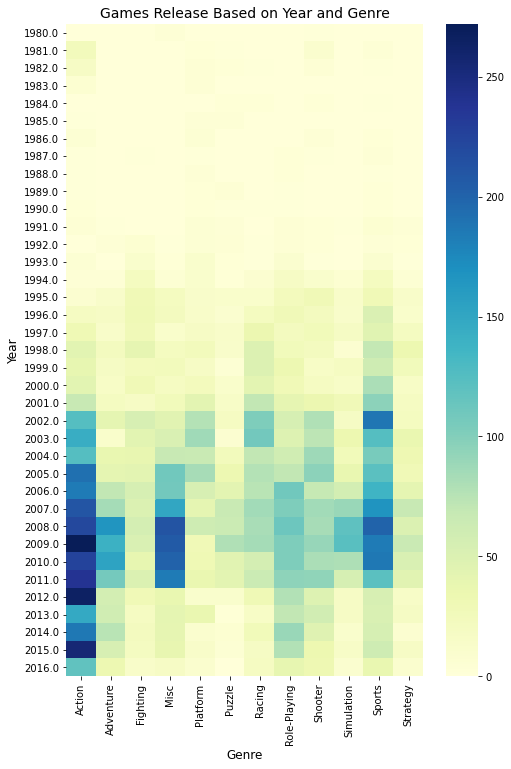

In [10]:
fig, ax = plt.subplots(figsize=(8,12))
ax = sns.heatmap(genre_salesP, linewidth=0, cmap='YlGnBu')
plt.title('Games Release Based on Year and Genre',fontsize=14)
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Year',fontsize=12)
plt.show()

Based on the heatmap above, it can be concluded that:
- The Action genre is the genre with the most releases. This genre was widely released from 2002 to 2016
- The Sport genre began to be widely released from 1996 to 2011
- The genres with the fewest releases are Strategy and Fighting
- Most games released on average from 2002 to 2011

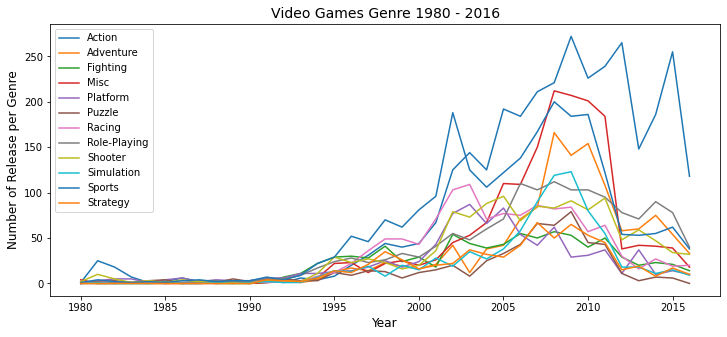

In [11]:
plt.figure(figsize=(12,5))

for sale in genre_salesP:
    if sale != 'Year':
        plt.plot(genre_salesP.index, genre_salesP[sale], linewidth=1.5, label=sale)

# plt.xticks(genre_salesP['Year'][::3],fontsize=14)
plt.yticks(fontsize=10)

plt.title('Video Games Genre 1980 - 2016', fontsize=14)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of Release per Genre',fontsize=12)
plt.legend(loc='upper left',fontsize=10)

plt.show()

This graph shows video games release based on genre between 1980 - 2016

### Question 2: What platforms do developers choose the most?

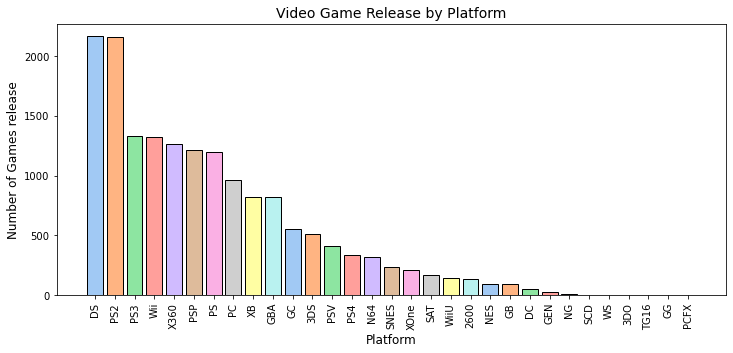

In [12]:
platform = sales['Platform'].value_counts()
colors = sns.color_palette('pastel')

plt.figure(figsize=(12,5))
plt.bar(platform.index,platform,color=colors,edgecolor='black')
plt.title('Video Game Release by Platform',fontsize=14)
plt.xlabel('Platform',fontsize=12)
plt.ylabel('Number of Games release',fontsize=12)
plt.xticks(rotation=90)
plt.show()

The graph above shows the platform that is most chosen to play the game is the DS. Followed by PS2, PS3, Wii, and so on.

### Question 3: Which publisher has the highest sales?

In [13]:
pub_sales = sales.drop(['Rank', 'Platform', 'Year', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales',], axis=1)
pub_sales.head()

,Name,Genre,Publisher,Global_Sales
0,Wii Sports,Sports,Nintendo,82.74
1,Super Mario Bros.,Platform,Nintendo,40.24
2,Mario Kart Wii,Racing,Nintendo,35.82
3,Wii Sports Resort,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,31.37


In [14]:
pub_sales = pub_sales.groupby('Publisher').agg('sum')
pub_sales.reset_index(inplace=True)
pub_sales['range'] = pd.cut(pub_sales['Global_Sales'], [0,10,100,1000,10000], right=False, labels=['A','B','C','D'])
pub_sales.sort_values(by='Global_Sales',ascending=False,inplace=True)
top_10 = pub_sales[0:10]

In [32]:
top_10

,Publisher,Global_Sales,range
359,Nintendo,1786.56,D
138,Electronic Arts,1110.32,D
21,Activision,727.46,C
456,Sony Computer Entertainment,607.50,C
525,Ubisoft,474.72,C
494,Take-Two Interactive,399.54,C
488,THQ,340.77,C
275,Konami Digital Entertainment,283.64,C
446,Sega,272.99,C
347,Namco Bandai Games,254.09,C


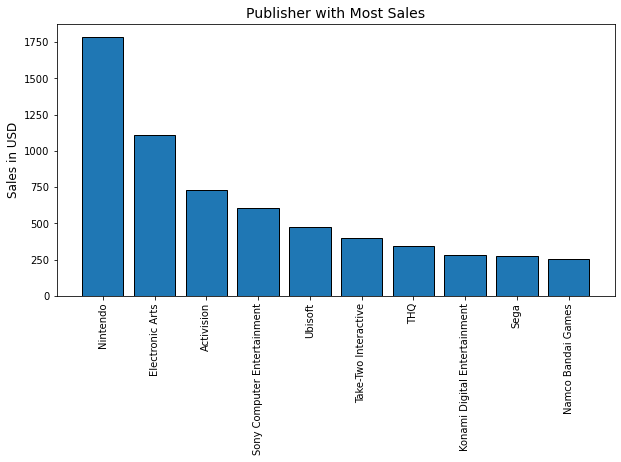

In [15]:
plt.figure(figsize=(10,5))
plt.bar(top_10['Publisher'],top_10['Global_Sales'],edgecolor='black')
plt.xticks(rotation=90)
plt.title('Publisher with Most Sales',fontsize=14)
plt.ylabel('Sales in USD',fontsize=12)
plt.show()

The graph above shows the 10 developers with the highest sales. The highest sales was Nintendo with global sales of 1786.56, followed by Electronic Arts, Activision, Sony Computer Entertainment, Ubisoft and so on

### Question 4: 5 developers with the highest sales along with favorite genres

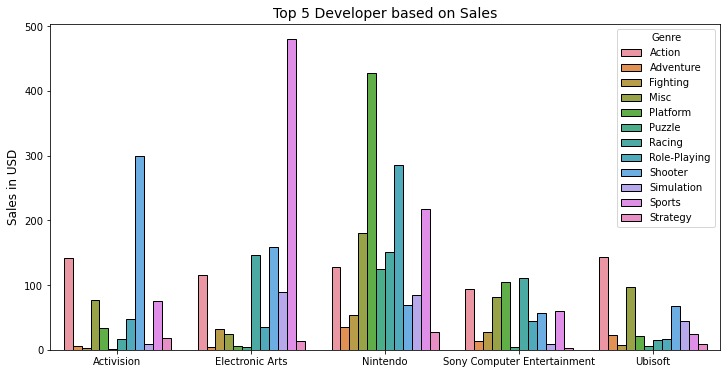

In [16]:
genre_sales = sales.drop(['Rank', 'Platform', 'Year', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
genre_sales = genre_sales.groupby(['Publisher','Genre']).agg('sum').reset_index()
top_5 = genre_sales.loc[genre_sales['Publisher'].isin(top_10['Publisher'][0:5].to_list())]
top_5 = top_5.rename(columns={'Global_Sales':'Sales'})

plt.figure(figsize=(12,6))
plt.title('Sales')
sns.barplot(x='Publisher', y='Sales', hue='Genre', data=top_5,edgecolor='black')
plt.title('Top 5 Developer based on Sales',fontsize=14)
plt.ylabel('Sales in USD',fontsize=12)
plt.xlabel('',fontsize=12)
plt.xticks(rotation=0)
plt.show()

The graph above shows the highest game sales by genre as seen from the 5 developers with the highest sales. The order of developers with the highest sales is Nintendo, Electronic Arts, Activision, Sony Computer Entertainment, Ubisoft.
- Nintendo: Genre with the highest selling is Platform.
- Electronic Arts: Genre with the highest sales is Sports.
- Activison: Genre with the highest sales is Shooter.
- Sony Computer Entertainment: Genre with the highest sales is Racing.
- Ubisoft: Genre with the highest sales is Action

Based on the graph above, it can be concluded that Electronic Arts has the highest sales in one genre. However, sales of other genres were low, so Electronic Arts did not take first place for Developer with the highest sales.

### Question 5: What are the most purchased genres by Region?

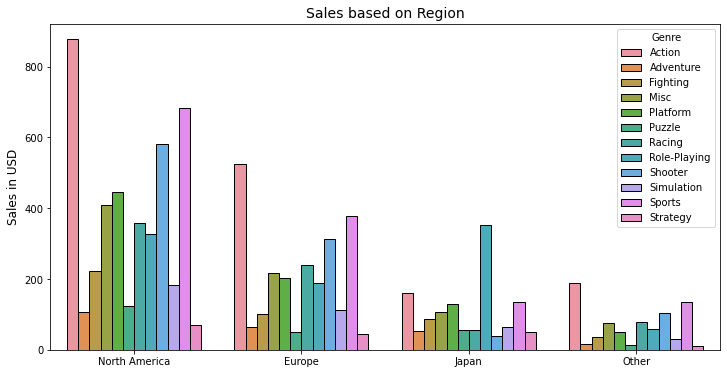

In [17]:
region_sales = sales.drop(['Rank','Name','Platform','Year','Publisher','Global_Sales'],axis=1)
region_sales = region_sales.groupby('Genre').agg('sum').reset_index()
region_sales = region_sales.rename(columns={'NA_Sales':'North America', 'EU_Sales':'Europe', 'JP_Sales':'Japan', 'Other_Sales':'Other'})
region_sales = pd.melt(region_sales, id_vars=['Genre'],value_vars=['North America', 'Europe', 'Japan', 'Other'],var_name='Region',value_name='Sales')

plt.figure(figsize=(12,6))
plt.title('Region Sales')
sns.barplot(x='Region', y='Sales', hue='Genre', data=region_sales,edgecolor='black')
plt.title('Sales based on Region',fontsize=14)
plt.ylabel('Sales in USD',fontsize=12)
plt.xlabel('',fontsize=12)
plt.xticks(rotation=0)
plt.show()

The graph above shows the highest game sales by genre in terms of Region. The order of Region with the highest sales is North America, Europe, Japan, and Other.
- North America: Genre with the highest selling is Action.
- Europe: Genre with the highest selling is Action.
- Japan: Genre with the highest selling is Role-Playing.
- Other: Genre with the highest selling is Action.

Based on the graph above, the favorite genres for the North America, Europe, and Other regions are Action and Sports. Meanwhile, for Japan, the genres with the highest sales are Role-Playing and Action.

### Question 6: What are the most purchased genres globally?

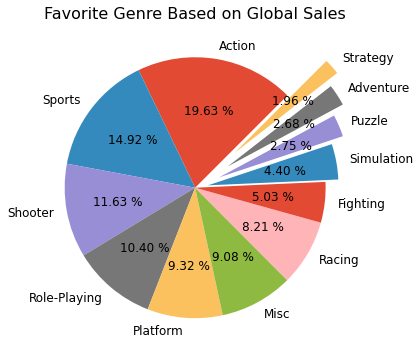

In [18]:
genre_sales = sales.drop(['Rank','Platform','Year','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
genre_sales = genre_sales.groupby('Genre').agg('sum')
genre_sales['percentage'] = genre_sales.apply(lambda x: (x['Global_Sales']/genre_sales['Global_Sales'].sum()*100),axis=1)
genre_sales = genre_sales.sort_values('Global_Sales',ascending=False).reset_index()

labels = genre_sales['Genre']
explode =  [0,0,0,0,0,0,0,0,0.1,0.2,0.3,0.4]

with plt.style.context('ggplot'):
    plt.figure(figsize=(6,6))
    plt.pie(genre_sales['Global_Sales'],labels=labels, autopct='%.2f %%', pctdistance=0.6, explode=explode, startangle=45,
            textprops={'fontsize':12})
    plt.title('Favorite Genre Based on Global Sales',fontsize=16)
    plt.show()

The most genre purchased globally is Action with 19.63% from all global sales. Followed by sports, shooter, and so on.

## Video Games Sales per Region

### North America

In [19]:
na_sales = sales.drop(['Rank','Year','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],axis=1)
na_sales

,Name,Platform,Genre,Publisher,NA_Sales
0,Wii Sports,Wii,Sports,Nintendo,41.49
1,Super Mario Bros.,NES,Platform,Nintendo,29.08
2,Mario Kart Wii,Wii,Racing,Nintendo,15.85
3,Wii Sports Resort,Wii,Sports,Nintendo,15.75
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,11.27
...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.01
16594,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00
16596,Know How 2,DS,Puzzle,7G//AMES,0.00


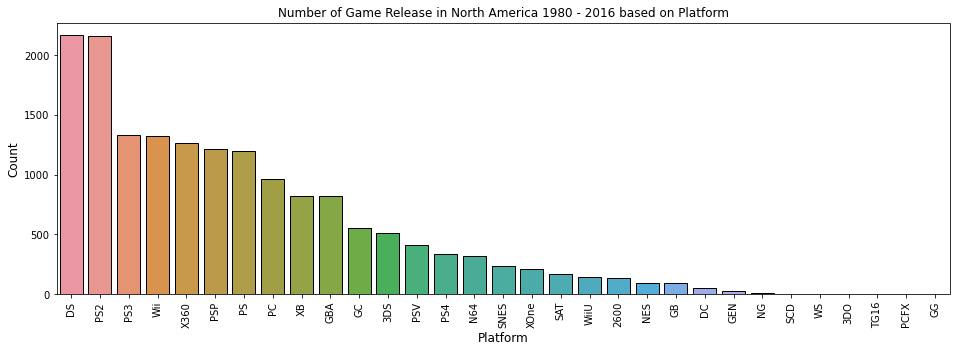

In [33]:
platform_na = na_sales.drop(['Name','Genre','Publisher'],axis=1)
platform_na = platform_na.groupby('Platform').agg('count')
platform_na = platform_na.sort_values('NA_Sales',ascending=False).reset_index()
platform_na = platform_na.rename(columns={'NA_Sales':'count'})

plt.figure(figsize=(16,5))
sns.barplot(x='Platform', y='count', data=platform_na,edgecolor='black')
plt.title('Number of Game Release in North America 1980 - 2016 based on Platform',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Platform',fontsize=12)
plt.xticks(rotation=90)
plt.show()

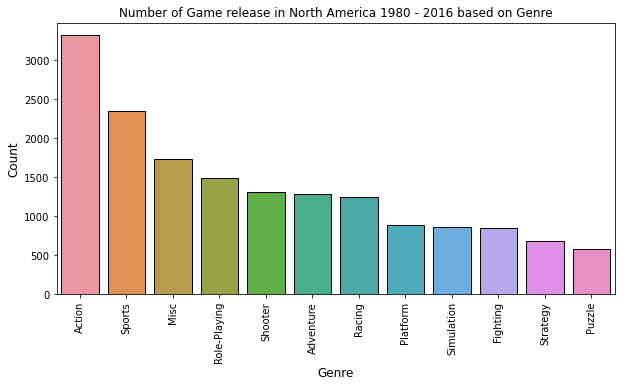

In [21]:
genre_na = na_sales.drop(['Name','Platform','Publisher'],axis=1)
genre_na = genre_na.groupby('Genre').agg('count')
genre_na = genre_na.sort_values('NA_Sales',ascending=False).reset_index()
genre_na = genre_na.rename(columns={'NA_Sales':'count'})
genre_na

plt.figure(figsize=(10,5))
sns.barplot(x='Genre', y='count', data=genre_na,edgecolor='black')
plt.title('Number of Game release in North America 1980 - 2016 based on Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Genre',fontsize=12)
plt.xticks(rotation=90)
plt.show()

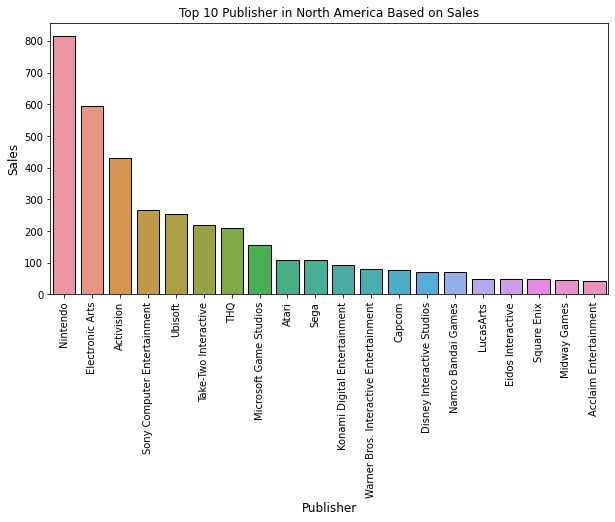

In [22]:
publisher_na = na_sales.drop(['Name','Platform','Genre'],axis=1)
publisher_na = publisher_na.groupby('Publisher').agg('sum')
publisher_na = publisher_na.sort_values('NA_Sales',ascending=False).reset_index()
publisher_na = publisher_na.rename(columns={'NA_Sales':'Sales'})
publisher_na = publisher_na[0:20]

plt.figure(figsize=(10,5))
sns.barplot(x='Publisher', y='Sales', data=publisher_na,edgecolor='black')
plt.title('Top 10 Publisher in North America Based on Sales',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.xlabel('Publisher',fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Europe

In [23]:
eu_sales = sales.drop(['Rank','Year','NA_Sales','JP_Sales','Other_Sales','Global_Sales'],axis=1)
eu_sales

,Name,Platform,Genre,Publisher,EU_Sales
0,Wii Sports,Wii,Sports,Nintendo,29.02
1,Super Mario Bros.,NES,Platform,Nintendo,3.58
2,Mario Kart Wii,Wii,Racing,Nintendo,12.88
3,Wii Sports Resort,Wii,Sports,Nintendo,11.01
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,8.89
...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.00
16594,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.00
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00
16596,Know How 2,DS,Puzzle,7G//AMES,0.01


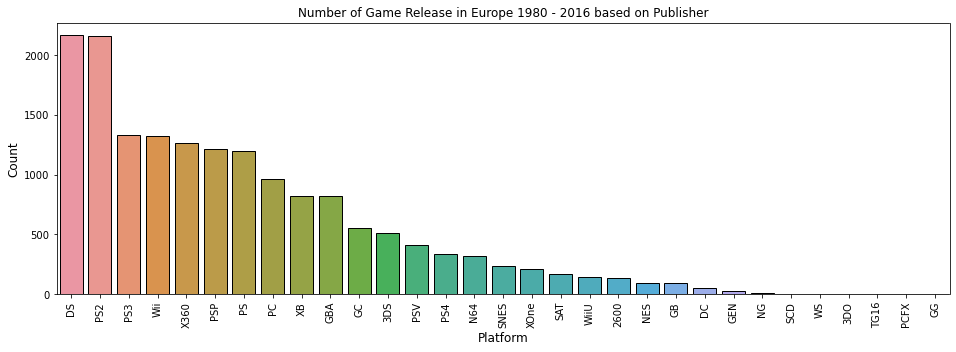

In [24]:
platform_eu = eu_sales.drop(['Name','Genre','Publisher'],axis=1)
platform_eu = platform_eu.groupby('Platform').agg('count')
platform_eu = platform_eu.sort_values('EU_Sales',ascending=False).reset_index()
platform_eu = platform_eu.rename(columns={'EU_Sales':'count'})

plt.figure(figsize=(16,5))
sns.barplot(x='Platform', y='count', data=platform_eu,edgecolor='black')
plt.title('Number of Game Release in Europe 1980 - 2016 based on Publisher',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Platform',fontsize=12)
plt.xticks(rotation=90)
plt.show()

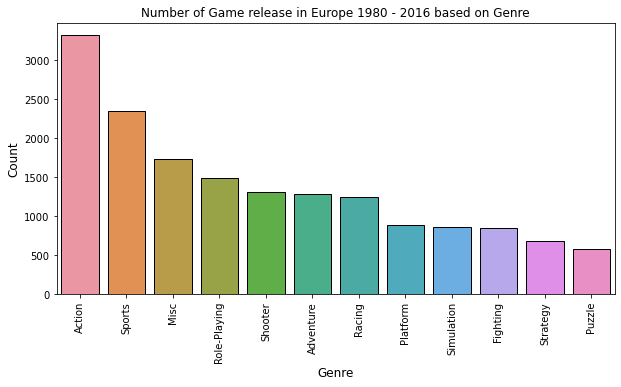

In [25]:
genre_eu = eu_sales.drop(['Name','Platform','Publisher'],axis=1)
genre_eu = genre_eu.groupby('Genre').agg('count')
genre_eu = genre_eu.sort_values('EU_Sales',ascending=False).reset_index()
genre_eu = genre_eu.rename(columns={'EU_Sales':'count'})
genre_eu

plt.figure(figsize=(10,5))
sns.barplot(x='Genre', y='count', data=genre_eu,edgecolor='black')
plt.title('Number of Game release in Europe 1980 - 2016 based on Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Genre',fontsize=12)
plt.xticks(rotation=90)
plt.show()

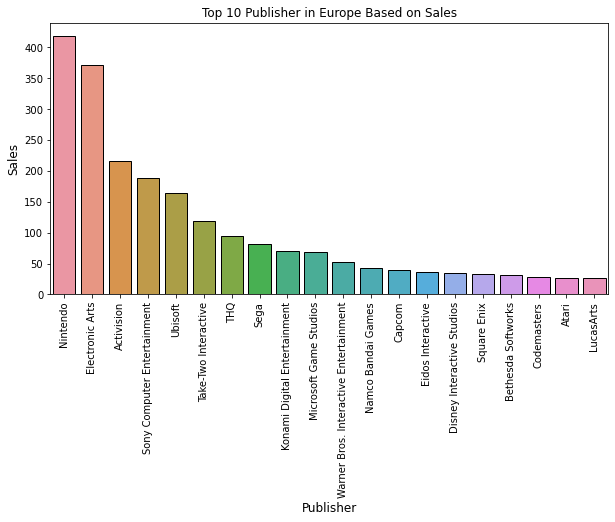

In [26]:
publisher_eu = eu_sales.drop(['Name','Platform','Genre'],axis=1)
publisher_eu = publisher_eu.groupby('Publisher').agg('sum')
publisher_eu = publisher_eu.sort_values('EU_Sales',ascending=False).reset_index()
publisher_eu = publisher_eu.rename(columns={'EU_Sales':'Sales'})
publisher_eu = publisher_eu[0:20]

plt.figure(figsize=(10,5))
sns.barplot(x='Publisher', y='Sales', data=publisher_eu,edgecolor='black')
plt.title('Top 10 Publisher in Europe Based on Sales',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.xlabel('Publisher',fontsize=12)
plt.xticks(rotation=90)
plt.show()

### Japan

In [27]:
jp_sales = sales.drop(['Rank','Year','NA_Sales','EU_Sales','Other_Sales','Global_Sales'],axis=1)
jp_sales

,Name,Platform,Genre,Publisher,JP_Sales
0,Wii Sports,Wii,Sports,Nintendo,3.77
1,Super Mario Bros.,NES,Platform,Nintendo,6.81
2,Mario Kart Wii,Wii,Racing,Nintendo,3.79
3,Wii Sports Resort,Wii,Sports,Nintendo,3.28
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo,10.22
...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco,0.00
16594,Men in Black II: Alien Escape,GC,Shooter,Infogrames,0.00
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision,0.00
16596,Know How 2,DS,Puzzle,7G//AMES,0.00


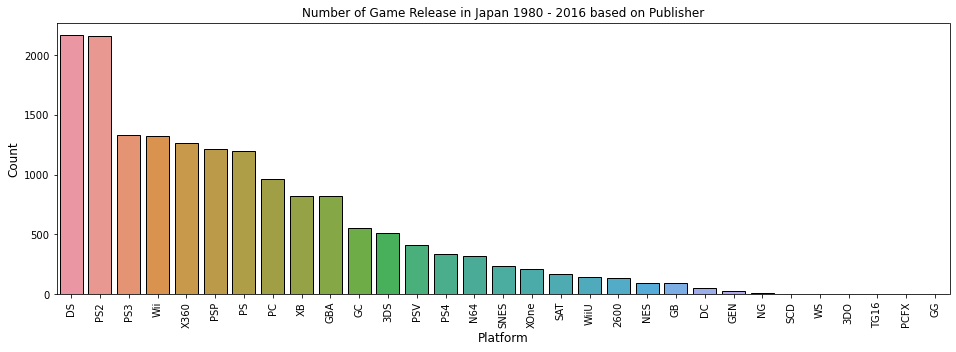

In [28]:
platform_jp = jp_sales.drop(['Name','Genre','Publisher'],axis=1)
platform_jp = platform_jp.groupby('Platform').agg('count')
platform_jp = platform_jp.sort_values('JP_Sales',ascending=False).reset_index()
platform_jp = platform_jp.rename(columns={'JP_Sales':'count'})

plt.figure(figsize=(16,5))
sns.barplot(x='Platform', y='count', data=platform_jp,edgecolor='black')
plt.title('Number of Game Release in Japan 1980 - 2016 based on Publisher',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Platform',fontsize=12)
plt.xticks(rotation=90)
plt.show()

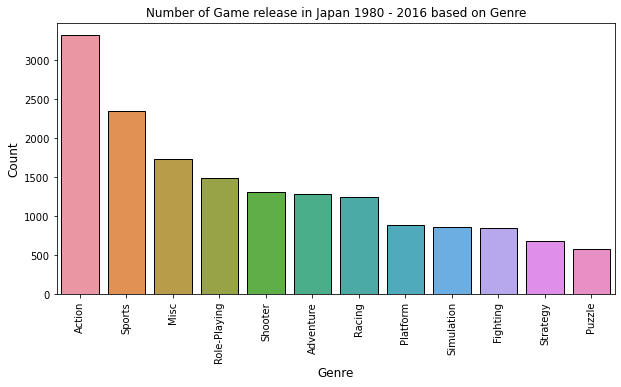

In [29]:
genre_jp = jp_sales.drop(['Name','Platform','Publisher'],axis=1)
genre_jp = genre_jp.groupby('Genre').agg('count')
genre_jp = genre_jp.sort_values('JP_Sales',ascending=False).reset_index()
genre_jp = genre_jp.rename(columns={'JP_Sales':'count'})

plt.figure(figsize=(10,5))
sns.barplot(x='Genre', y='count', data=genre_jp,edgecolor='black')
plt.title('Number of Game release in Japan 1980 - 2016 based on Genre',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xlabel('Genre',fontsize=12)
plt.xticks(rotation=90)
plt.show()

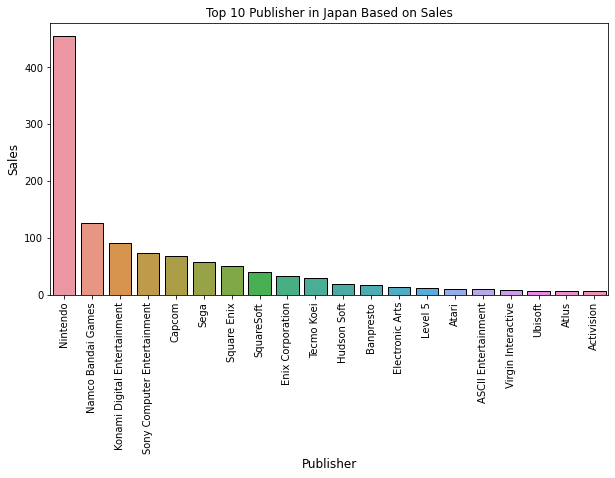

In [30]:
publisher_jp = jp_sales.drop(['Name','Platform','Genre'],axis=1)
publisher_jp = publisher_jp.groupby('Publisher').agg('sum')
publisher_jp = publisher_jp.sort_values('JP_Sales',ascending=False).reset_index()
publisher_jp = publisher_jp.rename(columns={'JP_Sales':'Sales'})
publisher_jp = publisher_jp[0:20]

plt.figure(figsize=(10,5))
sns.barplot(x='Publisher', y='Sales', data=publisher_jp,edgecolor='black')
plt.title('Top 10 Publisher in Japan Based on Sales',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.xlabel('Publisher',fontsize=12)
plt.xticks(rotation=90)
plt.show()

Unlike North America and Europe, the top 5 publisher in Japan is Nintendo, Namco Bandai Games, Konamo Digital Ent., Sony COmputer Ent., and Capcom. 